In [1]:
import pandas as pd

df = pd.read_csv("/content/sample_data/Electric_Vehicle_Population_Data.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/Electric_Vehicle_Population_Data.csv'

In [2]:
import os
os.listdir("/content/sample_data")


['README.md',
 'anscombe.json',
 'Electric_Vehicle_Population_Data.csv.csv',
 'california_housing_test.csv',
 'mnist_test.csv',
 'mnist_train_small.csv',
 'california_housing_train.csv']

In [3]:
import pandas as pd

df = pd.read_csv("/content/sample_data/Electric_Vehicle_Population_Data.csv.csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7SAYGDEE4T,King,Issaquah,WA,98027.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,41.0,280786565,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [4]:
df.shape


(270262, 16)

In [5]:
df.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270262 entries, 0 to 270261
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         270262 non-null  object 
 1   County                                             270252 non-null  object 
 2   City                                               270252 non-null  object 
 3   State                                              270262 non-null  object 
 4   Postal Code                                        270252 non-null  float64
 5   Model Year                                         270262 non-null  int64  
 6   Make                                               270262 non-null  object 
 7   Model                                              270262 non-null  object 
 8   Electric Vehicle Type                              270262 non-null  object

In [7]:
df.isnull().sum()


,0
VIN (1-10),0
County,10
City,10
State,0
Postal Code,10
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [8]:
df = df.drop_duplicates()


In [9]:
df = df.dropna()


In [10]:
df.isnull().sum()


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [11]:
df['Make'].value_counts().head(10)


,count
Make,
TESLA,110708
CHEVROLET,18989
NISSAN,15948
FORD,14768
KIA,13455
TOYOTA,11126
BMW,11011
HYUNDAI,9628
RIVIAN,8453


In [12]:
df['Electric Vehicle Type'].value_counts()


,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),215309
Plug-in Hybrid Electric Vehicle (PHEV),54221


In [13]:
df['Model Year'].value_counts().sort_index()


,count
Model Year,
1999,2
2000,8
2002,1
2003,1
2008,20
2010,23
2011,603
2012,1398
2013,3987


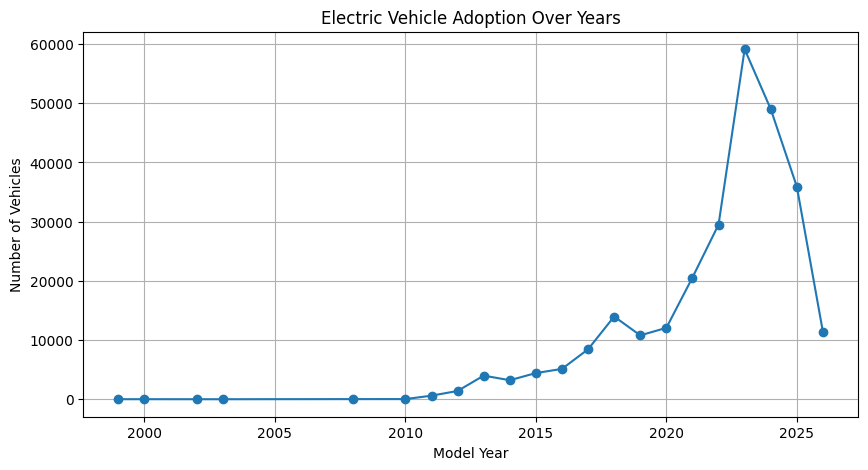

In [14]:
import matplotlib.pyplot as plt

year_counts = df['Model Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title("Electric Vehicle Adoption Over Years")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.grid(True)
plt.show()


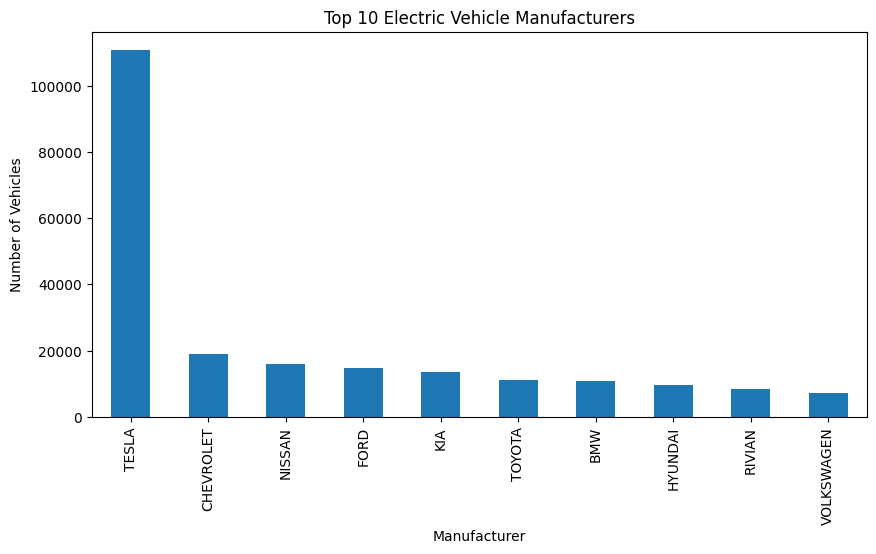

In [15]:
top_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_makes.plot(kind='bar')
plt.title("Top 10 Electric Vehicle Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Vehicles")
plt.show()


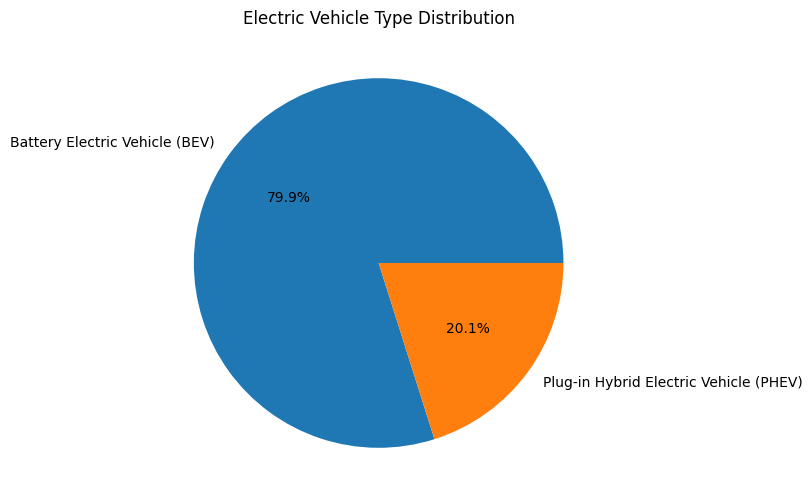

In [16]:
df['Electric Vehicle Type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)
)
plt.title("Electric Vehicle Type Distribution")
plt.ylabel("")
plt.show()
